<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Pytorch_Neural_network_simple_linear_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [157]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

Defining a function to create data set

In [189]:
def function(x):
  return 10*x**2 - 5*x - 0.5 + e

Adding noises

In [199]:
e = (torch.rand(100)).reshape(-1,1)

In [200]:
x_train = torch.rand(100).reshape(-1,1)
x_train_square = x_train*x_train
y_train = function(x_train).reshape(-1,1)
x = torch.cat((x_train,x_train_square),1)

Visualize data

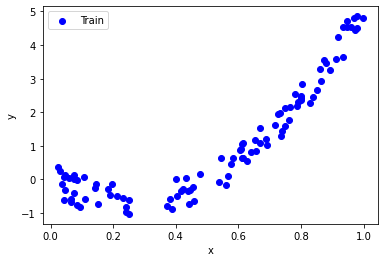

In [201]:
plt.scatter(x_train,y_train,label='Train',color='blue')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')
plt.tight_layout
plt.show()

Creating single layer basic neural network

In [202]:
class Model(nn.Module):
  def __init__(self,in_features,out_features):

    super().__init__()
    self.linear = nn.Linear(in_features,out_features)
  def forward(self,x):
    y_pred = self.linear(x)
    return y_pred

In [203]:
model = Model(2,1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[-0.4992,  0.2008]], requires_grad=True)
Parameter containing:
tensor([0.3302], requires_grad=True)


Defining cost function and optimization method

In [204]:
criterion = nn.MSELoss()

In [205]:
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

Training

In [ ]:
epochs = 10000
losses = []

for i in range(epochs):

  i = i + 1

  y_pred = model.forward(x) # Predicting on the forward pass

  loss = criterion(y_pred,y_train) #Calculating our loss

  losses.append(loss) # Recording the error

  print('epoch {} loss: {} weight: {} bias: {}'.format(i,loss.item(),model.linear.weight[0,0],model.linear.weight[0,1],model.linear.bias.item()))

  optimizer.zero_grad() #reseting the gradient

  loss.backward()
  optimizer.step()

Optimization check

Text(0.5, 0, 'Epoch')

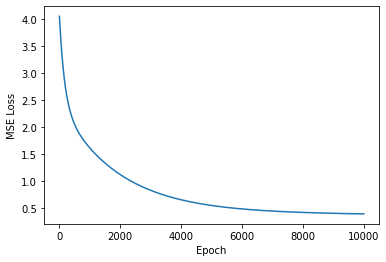

In [207]:
plt.plot(range(epochs),losses)
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')

In [209]:
model.linear.bias

Parameter containing:
tensor([-0.8629], requires_grad=True)

Prediction and curve fitting

In [211]:
current_weight1 = 1.4638
current_weight2 = 3.2650
current_bias = -0.8629
x_test = torch.linspace(0,1,100).reshape(-1,1)
#x_test_square = x_test*x_test
y_predicted = current_weight1*x_test**2 + current_weight2*x_test + current_bias
#xt = torch.cat((x_test,x_test_square),1)

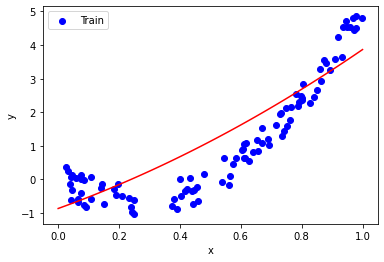

In [212]:
plt.scatter(x_train,y_train,label='Train',color='blue')
plt.plot(x_test,y_predicted,'r')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')
plt.tight_layout
plt.show()